## Combine the datasets to be used in modeling

**Matt Paterson, hello@hireMattPaterson.com**<br>
**Machine Learning Engineer**<br>
**Cloud Brigade, Santa Cruz, CA**

In [1]:
# Import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.linear_model      import LogisticRegression, LinearRegression
from sklearn.model_selection   import train_test_split, cross_val_score
from sklearn.cluster           import KMeans
from sklearn.decomposition     import PCA
from sklearn.preprocessing     import StandardScaler, OneHotEncoder, PolynomialFeatures

Before we can use the data that we've collected in any data science or machine learning models, we need to combine the data into one dataframe, eliminate null values or impute estimates in the cases of nulls, and then analyze the data itself to see what it is telling us.

## Import the data sets

In [2]:
path_to_home = '../'
datapath = path_to_home + 'data/'

1.  **Covid Data Set, case count and deaths**

In [3]:
filename = '2020-10-10_cumulative_covid_data.csv'

covid = pd.read_csv(datapath + filename)
covid.head()

,date,state_abr,state,county,confirmed_cases,deaths,latitude,longitude,average_temperature_celsius,rainfall_mm,fips
0,10/10/2020,VA,Virginia,Waynesboro,326.0,3.0,38.069722,-78.894444,NaN,NaN,51820.0
1,10/10/2020,VA,Virginia,Williamsburg,205.0,8.0,37.270800,-76.706900,NaN,NaN,51830.0
2,10/10/2020,VA,Virginia,Winchester,528.0,4.0,39.178300,-78.166700,NaN,NaN,51840.0
3,10/10/2020,VI,Virgin Islands,NaN,1325.0,20.0,18.333333,-64.833333,NaN,NaN,NaN
4,10/10/2020,VI,Virgin Islands,Saint Croix,489.0,6.0,17.731030,-64.791530,NaN,NaN,78010.0


In [4]:
covid.shape

(3285, 11)

In [5]:
covid = covid[covid['county'].notna()]

In [6]:
covid.shape

(3225, 11)

2. **Percapita income data**

In [7]:
filename = 'incomes.csv'

incomes = pd.read_csv(datapath + filename)
incomes.head()

,Rank,County or county-equivalent,"State, federal district or territory",Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1,New York County,New York,62498.0,69659.0,84627.0,1605272.0,736192.0
1,2,Arlington,Virginia,62018.0,103208.0,139244.0,214861.0,94454.0
2,3,Falls Church City,Virginia,59088.0,120000.0,152857.0,12731.0,5020.0
3,4,Marin,California,56791.0,90839.0,117357.0,254643.0,102912.0
4,5,Alexandria City,Virginia,54608.0,85706.0,107511.0,143684.0,65369.0


3. **Low-Income Housing data**
This table lists the fips code as geo_id, the percentage of rentals where tennants are paying more than 35% of their income on rent, and the percentage of rentals that are designated as "Low Income Housing"

***Note:*** <br>
Low-Income Housing Tax Credit
The Low-Income Housing Tax Credit is a dollar-for-dollar tax credit in the United States for affordable housing investments. It was created under the Tax Reform Act of 1986 and gives incentives for the utilization of private equity in the development of affordable housing aimed at low-income Americans. (SOURCE: Wikipedia)

In [8]:
filename = 'LowIncomeHousingData.csv'

lihd = pd.read_csv(datapath + filename)
lihd.head()

,geo_id,rental_percent_over_35_pcnt_income,rental_percent_LIHTC
0,28131,11.6,5.1
1,19161,21.5,2.7
2,45087,30.8,11.9
3,18025,31.8,6.5
4,29155,33.1,5.6


4.  **Medicare/Medicade Enrollment Data**

In [9]:
filename = 'medicare_medicade_table.csv'

medic = pd.read_csv(datapath + filename)
medic.head()

,State_Abbr,County_Name,QMB_Only,QMB_plus_Full,SLMB_only,SLMB_plus_Full,QDWI,QI,Other_full,Public_Total,Date,FIPS
0,AL,Autauga,668.0,558.0,332.0,35.0,0.0,244.0,132.0,1969.0,12/1/2018,1001
1,AL,Baldwin,2062.0,1385.0,1238.0,99.0,0.0,700.0,361.0,5845.0,12/1/2018,1003
2,AL,Barbour,597.0,642.0,294.0,29.0,0.0,163.0,137.0,1862.0,12/1/2018,1005
3,AL,Bibb,387.0,450.0,187.0,34.0,0.0,103.0,63.0,1224.0,12/1/2018,1007
4,AL,Blount,756.0,601.0,434.0,39.0,0.0,303.0,141.0,2274.0,12/1/2018,1009


5. **Population percentages by racial makeup**

In [10]:
filename = 'racial_pct.csv'

racial_pct = pd.read_csv(datapath + filename)
racial_pct.head()

,county_state,TOT_POP,pct_white,pct_black,pct_asian,pct_hispanic,pct_native_american,pct_hawaiian
0,"Autauga County, Alabama",55869,0.779735,0.210922,0.017004,0.029909,0.010292,0.001861
1,"Baldwin County, Alabama",223234,0.891903,0.095657,0.015011,0.047188,0.016140,0.001644
2,"Barbour County, Alabama",24686,0.501499,0.490845,0.006157,0.045248,0.012031,0.002471
3,"Bibb County, Alabama",22394,0.777887,0.219121,0.004332,0.027820,0.009244,0.001786
4,"Blount County, Alabama",57826,0.971310,0.022066,0.005395,0.096531,0.014180,0.001677


In [11]:
racial_pct[racial_pct['county_state'] == 'Jackson County, Arkansas']

,county_state,TOT_POP,pct_white,pct_black,pct_asian,pct_hispanic,pct_native_american,pct_hawaiian
144,"Jackson County, Arkansas",16719,0.810575,0.183803,0.007058,0.030086,0.015611,0.002931


6.  **SNAP Benefits recipients**

In [12]:
filename = 'snap_by_county.csv'

snap = pd.read_csv(datapath + filename)
snap.head()

,FIPS,SNAP_PA_Participation_Persons,SNAP_NPA_Participation_Persons,SNAP_All_Participation_Persons,SNAP_PA_Participation_Households,SNAP_NPA_Participation_Households,SNAP_All_Participation_Households,SNAP_All_Issuance
0,1009,883,4811,5694,563,2083,2646,1177374
1,17031,37815,805253,843068,17752,414180,431932,202265186
2,39035,26570,185878,212448,20534,92406,112940,30191208
3,6037,164288,865183,1029471,67840,472456,540296,264574869
4,49925,8123,167204,175327,3018,70626,73644,35208478


7. **FIPS - to - latitude/longitude converter**

In [13]:
filename = 'fips_lats_cities.csv'

lats = pd.read_csv(datapath + filename)
lats.head()

,zip,fips,city,state,county_name,state_name,latitude,longitude
0,36091,1001,Verbena,AL,Autauga County,Alabama,32.536667,-86.648333
1,36758,1001,Plantersville,AL,Autauga County,Alabama,32.536667,-86.648333
2,36006,1001,Billingsley,AL,Autauga County,Alabama,32.536667,-86.648333
3,36067,1001,Prattville,AL,Autauga County,Alabama,32.536667,-86.648333
4,36701,1001,Selma,AL,Autauga County,Alabama,32.536667,-86.648333


## Create a common column in the lats and the incomes tables
5 of the dataframes can be merged on the fips column. The other two tables can merge on the county-state column, but one has the county name in the wrong format. To rectify this, I'm going to engineer a couple of columns, one in the lats table and the other in the incomes table.

In [14]:
def drop_county(name):
    '''
    returns a county name without the word 'County'
    name is a string, an element of a pandas series
    '''
    name = name.replace("County", "")
    return name.strip()
        

In [15]:
lats['county_word'] = lats['county_name'].apply(drop_county)

In [16]:
incomes.columns

Index(['Rank', 'County or county-equivalent',
       'State, federal district or territory', 'Per capitaincome',
       'Medianhouseholdincome', 'Medianfamilyincome', 'Population',
       'Number ofhouseholds'],
      dtype='object')

In [17]:
incomes.rename(columns={'County or county-equivalent': 'county'}, inplace=True)

In [18]:
incomes['county'].apply(drop_county)

0                   New York
1                  Arlington
2          Falls Church City
3                      Marin
4            Alexandria City
                ...         
3138                 Willacy
3139    Kusilvak Census Area
3140                    Todd
3141                 Wheeler
3142           Oglala Lakota
Name: county, Length: 3143, dtype: object

In [19]:
incomes.iloc[3000:3150]

,Rank,county,"State, federal district or territory",Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
3000,3001,Harlan,Kentucky,16257.0,25906.0,33791.0,29012.0,11343.0
3001,3002,Morgan,Kentucky,16233.0,30658.0,41116.0,13657.0,4697.0
3002,3003,Culberson,Texas,16227.0,37105.0,43793.0,2345.0,838.0
3003,3004,Jefferson Davis,Mississippi,16216.0,27186.0,34986.0,12248.0,4895.0
3004,3005,Lake,Michigan,16202.0,29379.0,37664.0,11485.0,4096.0
...,...,...,...,...,...,...,...,...
3138,3139,Willacy,Texas,11313.0,25886.0,31592.0,22039.0,5499.0
3139,3140,Kusilvak Census Area,Alaska,11210.0,40176.0,40750.0,7678.0,1744.0
3140,3141,Todd,South Dakota,10575.0,31934.0,32671.0,9783.0,2680.0
3141,3142,Wheeler,Georgia,8948.0,24382.0,31556.0,7746.0,2096.0


In [20]:
incomes.rename(columns={'State, federal district or territory': 'state'}, inplace=True)

In [21]:
incomes.tail()

,Rank,county,state,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
3138,3139,Willacy,Texas,11313.0,25886.0,31592.0,22039.0,5499.0
3139,3140,Kusilvak Census Area,Alaska,11210.0,40176.0,40750.0,7678.0,1744.0
3140,3141,Todd,South Dakota,10575.0,31934.0,32671.0,9783.0,2680.0
3141,3142,Wheeler,Georgia,8948.0,24382.0,31556.0,7746.0,2096.0
3142,3143,Oglala Lakota,South Dakota,8768.0,25648.0,26029.0,13829.0,2867.0


In [22]:
incomes.dtypes

Rank                       int64
county                    object
state                     object
Per capitaincome         float64
Medianhouseholdincome    float64
Medianfamilyincome       float64
Population               float64
Number ofhouseholds      float64
dtype: object

In [23]:
# Create a function that will parse a string and return a float to convert dollars to foat
# already put this function in another notebook for use in the Assemble Data step
def make_float(data):
    '''
    convert dollar valued columns to float
    '''
    if type(data)==float:
        return data
    while "$" in data:
        data = data.replace("$", "")
    while "," in data:
        data = data.replace(",","")
    try:
        if float(data):
            print(f'{data} is a float')
        return float(data)
    except:
        #print(f'{data} is not a float')
        return data

In [24]:
incomes.drop(columns="Rank", inplace=True)

In [25]:
def add_county(name):
    return name + " County"

In [26]:
incomes['county'] = incomes['county'].apply(add_county)

In [27]:
incomes['county-state'] = incomes['county'] + ", " + incomes['state']

In [28]:
covid.columns

Index(['date', 'state_abr', 'state', 'county', 'confirmed_cases', 'deaths',
       'latitude', 'longitude', 'average_temperature_celsius', 'rainfall_mm',
       'fips'],
      dtype='object')

In [29]:
covid['county-state'] = covid['county'] + ", " + covid['state']

In [30]:
covid.columns

Index(['date', 'state_abr', 'state', 'county', 'confirmed_cases', 'deaths',
       'latitude', 'longitude', 'average_temperature_celsius', 'rainfall_mm',
       'fips', 'county-state'],
      dtype='object')

In [31]:
# df1.merge(df2, left_on='lkey', right_on='rkey')
cov_inc = covid.merge(incomes, how='left', left_on='county-state', right_on='county-state')
cov_inc.head()

,date,state_abr,state_x,county_x,confirmed_cases,deaths,latitude,longitude,average_temperature_celsius,rainfall_mm,fips,county-state,county_y,state_y,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,10/10/2020,VA,Virginia,Waynesboro,326.0,3.0,38.069722,-78.894444,NaN,NaN,51820.0,"Waynesboro, Virginia",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/10/2020,VA,Virginia,Williamsburg,205.0,8.0,37.270800,-76.706900,NaN,NaN,51830.0,"Williamsburg, Virginia",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/10/2020,VA,Virginia,Winchester,528.0,4.0,39.178300,-78.166700,NaN,NaN,51840.0,"Winchester, Virginia",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/10/2020,VI,Virgin Islands,Saint Croix,489.0,6.0,17.731030,-64.791530,NaN,NaN,78010.0,"Saint Croix, Virgin Islands",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/10/2020,VI,Virgin Islands,Saint John,65.0,1.0,18.333333,-64.733333,NaN,NaN,78020.0,"Saint John, Virgin Islands",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
cov_inc.shape

(3225, 19)

In [33]:
def int_or_gtfo(data):
    '''
    converts floats to ints, 999_999 if NaN
    '''
    try:
        return int(data)
    except:
        return 999_999

In [34]:
#cov_inc['fips'] = cov_inc['fips'].apply(int_or_gtfo)

In [35]:
len(cov_inc[cov_inc['fips']==999_999])

0

In [36]:
cov_inc.head()

,date,state_abr,state_x,county_x,confirmed_cases,deaths,latitude,longitude,average_temperature_celsius,rainfall_mm,fips,county-state,county_y,state_y,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,10/10/2020,VA,Virginia,Waynesboro,326.0,3.0,38.069722,-78.894444,NaN,NaN,51820.0,"Waynesboro, Virginia",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/10/2020,VA,Virginia,Williamsburg,205.0,8.0,37.270800,-76.706900,NaN,NaN,51830.0,"Williamsburg, Virginia",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/10/2020,VA,Virginia,Winchester,528.0,4.0,39.178300,-78.166700,NaN,NaN,51840.0,"Winchester, Virginia",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/10/2020,VI,Virgin Islands,Saint Croix,489.0,6.0,17.731030,-64.791530,NaN,NaN,78010.0,"Saint Croix, Virgin Islands",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/10/2020,VI,Virgin Islands,Saint John,65.0,1.0,18.333333,-64.733333,NaN,NaN,78020.0,"Saint John, Virgin Islands",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
racial_pct.rename(columns={'county_state':'county-state'}, inplace=True)

In [38]:
cov_inc = cov_inc.drop(columns=['county_y', 'state_y', 'average_temperature_celsius', 'rainfall_mm', 'date'])

In [39]:
cov_inc.dtypes

state_abr                 object
state_x                   object
county_x                  object
confirmed_cases          float64
deaths                   float64
latitude                 float64
longitude                float64
fips                     float64
county-state              object
Per capitaincome         float64
Medianhouseholdincome    float64
Medianfamilyincome       float64
Population               float64
Number ofhouseholds      float64
dtype: object

In [40]:
cov_inc.shape

(3225, 14)

In [41]:
cov_inc = cov_inc.merge(racial_pct, how='left', left_on='county-state', right_on='county-state')
cov_inc.head()

,state_abr,state_x,county_x,confirmed_cases,deaths,latitude,longitude,fips,county-state,Per capitaincome,...,Medianfamilyincome,Population,Number ofhouseholds,TOT_POP,pct_white,pct_black,pct_asian,pct_hispanic,pct_native_american,pct_hawaiian
0,VA,Virginia,Waynesboro,326.0,3.0,38.069722,-78.894444,51820.0,"Waynesboro, Virginia",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,VA,Virginia,Williamsburg,205.0,8.0,37.270800,-76.706900,51830.0,"Williamsburg, Virginia",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,VA,Virginia,Winchester,528.0,4.0,39.178300,-78.166700,51840.0,"Winchester, Virginia",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,VI,Virgin Islands,Saint Croix,489.0,6.0,17.731030,-64.791530,78010.0,"Saint Croix, Virgin Islands",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,VI,Virgin Islands,Saint John,65.0,1.0,18.333333,-64.733333,78020.0,"Saint John, Virgin Islands",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
cov_inc.shape

(3225, 21)

In [43]:
cov_inc.drop(columns='Population', inplace=True)
cov_inc.columns

Index(['state_abr', 'state_x', 'county_x', 'confirmed_cases', 'deaths',
       'latitude', 'longitude', 'fips', 'county-state', 'Per capitaincome',
       'Medianhouseholdincome', 'Medianfamilyincome', 'Number ofhouseholds',
       'TOT_POP', 'pct_white', 'pct_black', 'pct_asian', 'pct_hispanic',
       'pct_native_american', 'pct_hawaiian'],
      dtype='object')

In [44]:
cov_inc.rename(columns={'state_x':'state', 'county_x':'county', 'Per capitaincome':'percapita_income', 
                        'Medianhouseholdincome':'median_household_income', 
                        'Medianfamilyincome':'median_family_income',
                       'Number ofhouseholds':'number_of_households',
                       'TOT_POP':'Population'}, inplace=True)

In [45]:
cov_inc = cov_inc.merge(lihd, how='left', left_on='fips', right_on='geo_id')
cov_inc.head()

,state_abr,state,county,confirmed_cases,deaths,latitude,longitude,fips,county-state,percapita_income,...,Population,pct_white,pct_black,pct_asian,pct_hispanic,pct_native_american,pct_hawaiian,geo_id,rental_percent_over_35_pcnt_income,rental_percent_LIHTC
0,VA,Virginia,Waynesboro,326.0,3.0,38.069722,-78.894444,51820.0,"Waynesboro, Virginia",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51820.0,34.8,8.2
1,VA,Virginia,Williamsburg,205.0,8.0,37.270800,-76.706900,51830.0,"Williamsburg, Virginia",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,VA,Virginia,Winchester,528.0,4.0,39.178300,-78.166700,51840.0,"Winchester, Virginia",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51840.0,38.1,1.3
3,VI,Virgin Islands,Saint Croix,489.0,6.0,17.731030,-64.791530,78010.0,"Saint Croix, Virgin Islands",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,VI,Virgin Islands,Saint John,65.0,1.0,18.333333,-64.733333,78020.0,"Saint John, Virgin Islands",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
cov_inc.shape

(3225, 23)

In [47]:
cov_inc.isna().sum()

state_abr                               0
state                                   0
county                                  0
confirmed_cases                         8
deaths                                  8
latitude                                0
longitude                               0
fips                                    0
county-state                            0
percapita_income                      290
median_household_income               290
median_family_income                  290
number_of_households                  290
Population                            149
pct_white                             149
pct_black                             149
pct_asian                             149
pct_hispanic                          149
pct_native_american                   149
pct_hawaiian                          149
geo_id                                752
rental_percent_over_35_pcnt_income    752
rental_percent_LIHTC                  755
dtype: int64

In [48]:
cov_inc[cov_inc['county-state'].isna()]

,state_abr,state,county,confirmed_cases,deaths,latitude,longitude,fips,county-state,percapita_income,...,Population,pct_white,pct_black,pct_asian,pct_hispanic,pct_native_american,pct_hawaiian,geo_id,rental_percent_over_35_pcnt_income,rental_percent_LIHTC


In [49]:
cov_inc = cov_inc.merge(medic, how='left', left_on='fips', right_on='FIPS')
print(cov_inc.shape)
cov_inc.head()

(3225, 35)


,state_abr,state,county,confirmed_cases,deaths,latitude,longitude,fips,county-state,percapita_income,...,QMB_Only,QMB_plus_Full,SLMB_only,SLMB_plus_Full,QDWI,QI,Other_full,Public_Total,Date,FIPS
0,VA,Virginia,Waynesboro,326.0,3.0,38.069722,-78.894444,51820.0,"Waynesboro, Virginia",NaN,...,128.0,347.0,126.0,35.0,NaN,93.0,102.0,831.0,12/1/2018,51820.0
1,VA,Virginia,Williamsburg,205.0,8.0,37.270800,-76.706900,51830.0,"Williamsburg, Virginia",NaN,...,26.0,128.0,15.0,NaN,NaN,13.0,27.0,209.0,12/1/2018,51830.0
2,VA,Virginia,Winchester,528.0,4.0,39.178300,-78.166700,51840.0,"Winchester, Virginia",NaN,...,117.0,363.0,89.0,36.0,0.0,51.0,127.0,783.0,12/1/2018,51840.0
3,VI,Virgin Islands,Saint Croix,489.0,6.0,17.731030,-64.791530,78010.0,"Saint Croix, Virgin Islands",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,VI,Virgin Islands,Saint John,65.0,1.0,18.333333,-64.733333,78020.0,"Saint John, Virgin Islands",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
cov_inc = cov_inc.merge(snap, how='left', left_on='fips', right_on='FIPS')
print(cov_inc.shape)
cov_inc.head()

(3225, 43)


,state_abr,state,county,confirmed_cases,deaths,latitude,longitude,fips,county-state,percapita_income,...,Date,FIPS_x,FIPS_y,SNAP_PA_Participation_Persons,SNAP_NPA_Participation_Persons,SNAP_All_Participation_Persons,SNAP_PA_Participation_Households,SNAP_NPA_Participation_Households,SNAP_All_Participation_Households,SNAP_All_Issuance
0,VA,Virginia,Waynesboro,326.0,3.0,38.069722,-78.894444,51820.0,"Waynesboro, Virginia",NaN,...,12/1/2018,51820.0,51820.0,433.0,2324.0,2757.0,308.0,1105.0,1413.0,573642.0
1,VA,Virginia,Williamsburg,205.0,8.0,37.270800,-76.706900,51830.0,"Williamsburg, Virginia",NaN,...,12/1/2018,51830.0,51830.0,126.0,950.0,1076.0,83.0,444.0,527.0,263247.0
2,VA,Virginia,Winchester,528.0,4.0,39.178300,-78.166700,51840.0,"Winchester, Virginia",NaN,...,12/1/2018,51840.0,51840.0,343.0,2922.0,3265.0,273.0,1349.0,1622.0,719700.0
3,VI,Virgin Islands,Saint Croix,489.0,6.0,17.731030,-64.791530,78010.0,"Saint Croix, Virgin Islands",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,VI,Virgin Islands,Saint John,65.0,1.0,18.333333,-64.733333,78020.0,"Saint John, Virgin Islands",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
cov_inc = cov_inc[cov_inc['deaths'].notna()]


In [52]:
# cov_inc = cov_inc.merge(lats, how='left', left_on='fips', right_on='fips')
# print(cov_inc.shape)
# cov_inc.head()

In [53]:
cov_inc.isna().sum()

state_abr                               0
state                                   0
county                                  0
confirmed_cases                         0
deaths                                  0
latitude                                0
longitude                               0
fips                                    0
county-state                            0
percapita_income                      287
median_household_income               287
median_family_income                  287
number_of_households                  287
Population                            147
pct_white                             147
pct_black                             147
pct_asian                             147
pct_hispanic                          147
pct_native_american                   147
pct_hawaiian                          147
geo_id                                744
rental_percent_over_35_pcnt_income    744
rental_percent_LIHTC                  747
State_Abbr                        

In [54]:
cov_inc['deaths_per_100k'] = (cov_inc['deaths'] / cov_inc['Population']) * 100_000
cov_inc['cases_per_100k'] = (cov_inc['confirmed_cases'] / cov_inc['Population']) * 100_000

In [55]:
#cov_inc['state_x', 'county', 'county-state', 'deaths_per_100k', 'cases_per_100K'][(cov_inc['pct_asian'].isna()) & (cov_inc['state_x']=='Virginia')]
#cov_inc[['county','Population','deaths', 'deaths_per_100k']][(cov_inc['pct_asian'].isna())]
cov_inc[(cov_inc['pct_asian'].isna())]

,state_abr,state,county,confirmed_cases,deaths,latitude,longitude,fips,county-state,percapita_income,...,FIPS_y,SNAP_PA_Participation_Persons,SNAP_NPA_Participation_Persons,SNAP_All_Participation_Persons,SNAP_PA_Participation_Households,SNAP_NPA_Participation_Households,SNAP_All_Participation_Households,SNAP_All_Issuance,deaths_per_100k,cases_per_100k
0,VA,Virginia,Waynesboro,326.0,3.0,38.069722,-78.894444,51820.0,"Waynesboro, Virginia",NaN,...,51820.0,433.0,2324.0,2757.0,308.0,1105.0,1413.0,573642.0,NaN,NaN
1,VA,Virginia,Williamsburg,205.0,8.0,37.270800,-76.706900,51830.0,"Williamsburg, Virginia",NaN,...,51830.0,126.0,950.0,1076.0,83.0,444.0,527.0,263247.0,NaN,NaN
2,VA,Virginia,Winchester,528.0,4.0,39.178300,-78.166700,51840.0,"Winchester, Virginia",NaN,...,51840.0,343.0,2922.0,3265.0,273.0,1349.0,1622.0,719700.0,NaN,NaN
3,VI,Virgin Islands,Saint Croix,489.0,6.0,17.731030,-64.791530,78010.0,"Saint Croix, Virgin Islands",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,VI,Virgin Islands,Saint John,65.0,1.0,18.333333,-64.733333,78020.0,"Saint John, Virgin Islands",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,PR,Puerto Rico,Maricao Municipio,88.0,0.0,18.180790,-66.979900,72093.0,"Maricao Municipio, Puerto Rico",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2253,PR,Puerto Rico,Maunabo Municipio,154.0,0.0,18.007189,-65.899328,72095.0,"Maunabo Municipio, Puerto Rico",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3022,MO,Missouri,St. Louis,7528.0,217.0,38.616667,-90.200000,29510.0,"St. Louis, Missouri",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3023,MP,Northern Mariana Islands,Saipan,75.0,2.0,15.183333,145.750000,69110.0,"Saipan, Northern Mariana Islands",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
cov_inc = cov_inc[(cov_inc['state']!='Virgin Islands') &
                 (cov_inc['state']!='Puerto Rico') &
                 (cov_inc['state']!='Northern Mariana Islands')]

In [57]:
cov_inc[(cov_inc['pct_asian'].isna())]

,state_abr,state,county,confirmed_cases,deaths,latitude,longitude,fips,county-state,percapita_income,...,FIPS_y,SNAP_PA_Participation_Persons,SNAP_NPA_Participation_Persons,SNAP_All_Participation_Persons,SNAP_PA_Participation_Households,SNAP_NPA_Participation_Households,SNAP_All_Participation_Households,SNAP_All_Issuance,deaths_per_100k,cases_per_100k
0,VA,Virginia,Waynesboro,326.0,3.0,38.069722,-78.894444,51820.0,"Waynesboro, Virginia",NaN,...,51820.0,433.0,2324.0,2757.0,308.0,1105.0,1413.0,573642.0,NaN,NaN
1,VA,Virginia,Williamsburg,205.0,8.0,37.270800,-76.706900,51830.0,"Williamsburg, Virginia",NaN,...,51830.0,126.0,950.0,1076.0,83.0,444.0,527.0,263247.0,NaN,NaN
2,VA,Virginia,Winchester,528.0,4.0,39.178300,-78.166700,51840.0,"Winchester, Virginia",NaN,...,51840.0,343.0,2922.0,3265.0,273.0,1349.0,1622.0,719700.0,NaN,NaN
445,VA,Virginia,Alexandria,4009.0,73.0,38.804722,-77.047222,51510.0,"Alexandria, Virginia",NaN,...,51510.0,1756.0,6839.0,8595.0,1003.0,3218.0,4221.0,1970282.0,NaN,NaN
446,VA,Virginia,Bristol,210.0,7.0,36.611100,-82.176200,51520.0,"Bristol, Virginia",NaN,...,51520.0,663.0,3309.0,3972.0,449.0,1598.0,2047.0,887455.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,AK,Alaska,Southeast Fairbanks,47.0,0.0,63.770000,-143.600000,2240.0,"Southeast Fairbanks, Alaska",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1517,AK,Alaska,Valdez-Cordova,134.0,0.0,61.400000,-144.500000,2261.0,"Valdez-Cordova, Alaska",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1518,AK,Alaska,Wrangell,19.0,0.0,56.470830,-132.376670,2275.0,"Wrangell, Alaska",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1520,AK,Alaska,Yukon-Koyukuk,90.0,2.0,65.700000,-152.716670,2290.0,"Yukon-Koyukuk, Alaska",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
cov_inc[(cov_inc['pct_asian'].isna()) & (cov_inc['state']=='Missouri')]

,state_abr,state,county,confirmed_cases,deaths,latitude,longitude,fips,county-state,percapita_income,...,FIPS_y,SNAP_PA_Participation_Persons,SNAP_NPA_Participation_Persons,SNAP_All_Participation_Persons,SNAP_PA_Participation_Households,SNAP_NPA_Participation_Households,SNAP_All_Participation_Households,SNAP_All_Issuance,deaths_per_100k,cases_per_100k
3022,MO,Missouri,St. Louis,7528.0,217.0,38.616667,-90.2,29510.0,"St. Louis, Missouri",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
cov_inc['Population'].isna().sum()

64

In [60]:
len(cov_inc[(cov_inc['pct_asian'].isna()) & (cov_inc['state']=='Virginia')])

38

In [61]:
cov_inc[cov_inc['pct_asian'].notna()]

,state_abr,state,county,confirmed_cases,deaths,latitude,longitude,fips,county-state,percapita_income,...,FIPS_y,SNAP_PA_Participation_Persons,SNAP_NPA_Participation_Persons,SNAP_All_Participation_Persons,SNAP_PA_Participation_Households,SNAP_NPA_Participation_Households,SNAP_All_Participation_Households,SNAP_All_Issuance,deaths_per_100k,cases_per_100k
6,VT,Vermont,Addison County,112.0,2.0,44.032776,-73.167923,50001.0,"Addison County, Vermont",28722.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.438181,304.538162
7,VT,Vermont,Bennington County,127.0,1.0,43.029419,-73.107956,50003.0,"Bennington County, Vermont",29196.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.819284,358.049056
8,VT,Vermont,Caledonia County,34.0,0.0,44.458221,-72.095627,50005.0,"Caledonia County, Vermont",23584.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,113.359784
9,VT,Vermont,Chittenden County,873.0,39.0,44.475681,-73.127274,50007.0,"Chittenden County, Vermont",33281.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.813304,533.051644
10,VT,Vermont,Essex County,6.0,0.0,44.720894,-71.745018,50009.0,"Essex County, Vermont",20887.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,97.355184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3220,IA,Iowa,Emmet County,345.0,11.0,43.377222,-94.677500,19063.0,"Emmet County, Iowa",27908.0,...,19063.0,119.0,852.0,971.0,67.0,386.0,453.0,196426.0,119.461338,3746.741964
3221,IA,Iowa,Fayette County,285.0,2.0,42.865000,-91.849444,19065.0,"Fayette County, Iowa",23391.0,...,19065.0,367.0,1949.0,2316.0,259.0,853.0,1112.0,466968.0,10.178117,1450.381679
3222,IA,Iowa,Floyd County,388.0,9.0,43.056667,-92.783889,19067.0,"Floyd County, Iowa",24590.0,...,19067.0,249.0,1537.0,1786.0,152.0,657.0,809.0,356292.0,57.537399,2480.501215
3223,IA,Iowa,Franklin County,362.0,18.0,42.730833,-93.267500,19069.0,"Franklin County, Iowa",26102.0,...,19069.0,73.0,796.0,869.0,53.0,341.0,394.0,182651.0,178.748759,3594.836147


In [62]:
cov_inc.shape

(3134, 45)

## Clean up the data set

In [63]:
cov_inc.dtypes

state_abr                              object
state                                  object
county                                 object
confirmed_cases                       float64
deaths                                float64
latitude                              float64
longitude                             float64
fips                                  float64
county-state                           object
percapita_income                      float64
median_household_income               float64
median_family_income                  float64
number_of_households                  float64
Population                            float64
pct_white                             float64
pct_black                             float64
pct_asian                             float64
pct_hispanic                          float64
pct_native_american                   float64
pct_hawaiian                          float64
geo_id                                float64
rental_percent_over_35_pcnt_income

In [64]:
cov_inc.drop(columns=['Date'], inplace=True)

In [65]:
cov_inc.isna().sum()

state_abr                               0
state                                   0
county                                  0
confirmed_cases                         0
deaths                                  0
latitude                                0
longitude                               0
fips                                    0
county-state                            0
percapita_income                      204
median_household_income               204
median_family_income                  204
number_of_households                  204
Population                             64
pct_white                              64
pct_black                              64
pct_asian                              64
pct_hispanic                           64
pct_native_american                    64
pct_hawaiian                           64
geo_id                                687
rental_percent_over_35_pcnt_income    687
rental_percent_LIHTC                  688
State_Abbr                        

## Drop some obvious merging errors
There are some columns such as FIPS_x, FIPS_y, and fips where there was an overlap. We can drop the redundant columns

In [66]:
drops = list(cov_inc.index[cov_inc['FIPS_y'].isna()])
for drop in drops:
    print(drop)

6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
257
318
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
352
476
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
804
805
806
807
809
814
820
822
823
825
826
827
828
829
832
833
834
835
836
837
838
840
842
845
846
849
853
854
855
957
958
959
960
961
962
963
964
965
966
967
968
969
970
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1019
1022
1023
1024
1027
1030
1031
1032
1033
1035
1042
1043
1044
1045
1052
1053
1054
1059
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
119

Also judging from above, the SNAP data does not include the entire states of Vermont, Washington, Wyoming, Idaho, New Hampshire, Alaska, Oregon, New York, North Carolina, Nebraska, Illinois, Montana, Connecticut, the District of Columbia and Missouri. It's possible to use this data on the areas where it is relevant but not likely to be worth imputing this data as it makes up nearly 1/3 of the rows on the data table. 

In [67]:
snap_states = cov_inc[cov_inc['FIPS_y'].notna()].copy()
snap_states.shape

(2382, 44)

In [68]:
snap_states.corr()

,confirmed_cases,deaths,latitude,longitude,fips,percapita_income,median_household_income,median_family_income,number_of_households,Population,...,FIPS_y,SNAP_PA_Participation_Persons,SNAP_NPA_Participation_Persons,SNAP_All_Participation_Persons,SNAP_PA_Participation_Households,SNAP_NPA_Participation_Households,SNAP_All_Participation_Households,SNAP_All_Issuance,deaths_per_100k,cases_per_100k
confirmed_cases,1.000000,0.909751,-0.099330,-0.067928,-0.068872,0.165232,0.165836,0.148206,0.961697,0.969821,...,-0.068872,0.734630,0.943192,0.942490,0.628542,0.945251,0.933229,0.935127,0.069983,0.083848
deaths,0.909751,1.000000,-0.063047,0.007368,-0.055858,0.178194,0.169937,0.156290,0.904990,0.894350,...,-0.055858,0.769250,0.894320,0.902842,0.711553,0.899115,0.904724,0.903514,0.173194,0.064025
latitude,-0.099330,-0.063047,1.000000,0.011313,0.116629,0.311895,0.251428,0.298940,-0.058352,-0.066844,...,0.116629,0.012124,-0.093797,-0.082960,0.013931,-0.084606,-0.073008,-0.081578,-0.392139,-0.321164
longitude,-0.067928,0.007368,0.011313,1.000000,0.162050,-0.104817,-0.086468,-0.085109,-0.067655,-0.081482,...,0.162050,-0.011577,-0.061880,-0.057205,0.055037,-0.068528,-0.052574,-0.079790,0.122081,0.011498
fips,-0.068872,-0.055858,0.116629,0.162050,1.000000,0.052990,0.057933,0.057495,-0.075311,-0.071598,...,1.000000,-0.072776,-0.058287,-0.061704,-0.056551,-0.063588,-0.064918,-0.073739,-0.105922,-0.126659
percapita_income,0.165232,0.178194,0.311895,-0.104817,0.052990,1.000000,0.882608,0.912408,0.245016,0.234428,...,0.052990,0.128343,0.115780,0.120493,0.138068,0.118945,0.126170,0.112636,-0.237964,-0.260544
median_household_income,0.165836,0.169937,0.251428,-0.086468,0.057933,0.882608,1.000000,0.963566,0.234276,0.235739,...,0.057933,0.113559,0.110132,0.113544,0.109903,0.109557,0.113661,0.109424,-0.211113,-0.207877
median_family_income,0.148206,0.156290,0.298940,-0.085109,0.057495,0.912408,0.963566,1.000000,0.224964,0.220894,...,0.057495,0.109400,0.092869,0.097460,0.113099,0.093855,0.100171,0.092752,-0.228655,-0.220851
number_of_households,0.961697,0.904990,-0.058352,-0.067655,-0.075311,0.245016,0.234276,0.224964,1.000000,0.995451,...,-0.075311,0.783125,0.935950,0.942083,0.695654,0.945892,0.943918,0.937378,0.041628,0.010258
Population,0.969821,0.894350,-0.066844,-0.081482,-0.071598,0.234428,0.235739,0.220894,0.995451,1.000000,...,-0.071598,0.771059,0.930138,0.935342,0.671270,0.938335,0.933573,0.931382,0.034153,0.011258


In [69]:
snap_states['pct_SNAP'] = (snap_states['SNAP_All_Participation_Persons'] / snap_states['Population']) * 100_000

In [70]:
snap_states[['SNAP_All_Participation_Persons','Population', 'pct_SNAP']]

,SNAP_All_Participation_Persons,Population,pct_SNAP
0,2757.0,NaN,NaN
1,1076.0,NaN,NaN
2,3265.0,NaN,NaN
59,2958.0,20220.0,14629.080119
60,2350.0,15562.0,15100.886775
...,...,...,...
3220,971.0,9208.0,10545.178106
3221,2316.0,19650.0,11786.259542
3222,1786.0,15642.0,11417.977241
3223,869.0,10070.0,8629.592850


In [71]:
snap_states.rename(columns={'pct_SNAP': 'SNAP_per_100k'}, inplace=True)

In [72]:
snap_states.corr()

,confirmed_cases,deaths,latitude,longitude,fips,percapita_income,median_household_income,median_family_income,number_of_households,Population,...,SNAP_PA_Participation_Persons,SNAP_NPA_Participation_Persons,SNAP_All_Participation_Persons,SNAP_PA_Participation_Households,SNAP_NPA_Participation_Households,SNAP_All_Participation_Households,SNAP_All_Issuance,deaths_per_100k,cases_per_100k,SNAP_per_100k
confirmed_cases,1.000000,0.909751,-0.099330,-0.067928,-0.068872,0.165232,0.165836,0.148206,0.961697,0.969821,...,0.734630,0.943192,0.942490,0.628542,0.945251,0.933229,0.935127,0.069983,0.083848,-0.020672
deaths,0.909751,1.000000,-0.063047,0.007368,-0.055858,0.178194,0.169937,0.156290,0.904990,0.894350,...,0.769250,0.894320,0.902842,0.711553,0.899115,0.904724,0.903514,0.173194,0.064025,-0.000856
latitude,-0.099330,-0.063047,1.000000,0.011313,0.116629,0.311895,0.251428,0.298940,-0.058352,-0.066844,...,0.012124,-0.093797,-0.082960,0.013931,-0.084606,-0.073008,-0.081578,-0.392139,-0.321164,-0.363595
longitude,-0.067928,0.007368,0.011313,1.000000,0.162050,-0.104817,-0.086468,-0.085109,-0.067655,-0.081482,...,-0.011577,-0.061880,-0.057205,0.055037,-0.068528,-0.052574,-0.079790,0.122081,0.011498,0.142306
fips,-0.068872,-0.055858,0.116629,0.162050,1.000000,0.052990,0.057933,0.057495,-0.075311,-0.071598,...,-0.072776,-0.058287,-0.061704,-0.056551,-0.063588,-0.064918,-0.073739,-0.105922,-0.126659,-0.067599
percapita_income,0.165232,0.178194,0.311895,-0.104817,0.052990,1.000000,0.882608,0.912408,0.245016,0.234428,...,0.128343,0.115780,0.120493,0.138068,0.118945,0.126170,0.112636,-0.237964,-0.260544,-0.622309
median_household_income,0.165836,0.169937,0.251428,-0.086468,0.057933,0.882608,1.000000,0.963566,0.234276,0.235739,...,0.113559,0.110132,0.113544,0.109903,0.109557,0.113661,0.109424,-0.211113,-0.207877,-0.626224
median_family_income,0.148206,0.156290,0.298940,-0.085109,0.057495,0.912408,0.963566,1.000000,0.224964,0.220894,...,0.109400,0.092869,0.097460,0.113099,0.093855,0.100171,0.092752,-0.228655,-0.220851,-0.637923
number_of_households,0.961697,0.904990,-0.058352,-0.067655,-0.075311,0.245016,0.234276,0.224964,1.000000,0.995451,...,0.783125,0.935950,0.942083,0.695654,0.945892,0.943918,0.937378,0.041628,0.010258,-0.051358
Population,0.969821,0.894350,-0.066844,-0.081482,-0.071598,0.234428,0.235739,0.220894,0.995451,1.000000,...,0.771059,0.930138,0.935342,0.671270,0.938335,0.933573,0.931382,0.034153,0.011258,-0.057783


In [85]:
snap_states.percapita_income.describe()

count     2227.000000
mean     23286.848226
std       5472.556468
min       8948.000000
25%      19647.500000
50%      22649.000000
75%      26006.000000
max      62018.000000
Name: percapita_income, dtype: float64

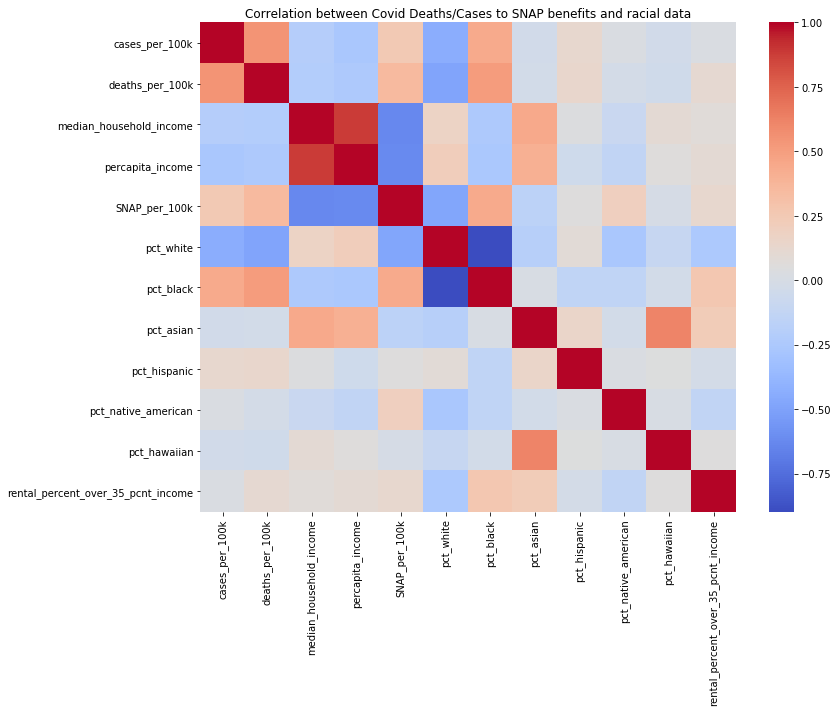

In [87]:
plt.figure(figsize=(12, 9))
sns.heatmap(snap_states[['cases_per_100k', 'deaths_per_100k', 'median_household_income',
                         'percapita_income','SNAP_per_100k',
                        'pct_white', 'pct_black', 'pct_asian', 'pct_hispanic',
                        'pct_native_american', 'pct_hawaiian', 'rental_percent_over_35_pcnt_income',
                        ]].corr(), cmap='coolwarm');

plt.title('Correlation between Covid Deaths/Cases to SNAP benefits and racial data');

So there is a 33% positive correlation between the percapita SNAP recipients and teh percapita deaths in a given county. Interesting is that the correlation is 10 percentage points weaker for postive tests per 100K, or percapita cases.

In [74]:
snap_states[['cases_per_100k', 'deaths_per_100k','SNAP_per_100k']]

,cases_per_100k,deaths_per_100k,SNAP_per_100k
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
59,1562.809100,19.782394,14629.080119
60,1265.904125,12.851819,15100.886775
...,...,...,...
3220,3746.741964,119.461338,10545.178106
3221,1450.381679,10.178117,11786.259542
3222,2480.501215,57.537399,11417.977241
3223,3594.836147,178.748759,8629.592850


In [75]:
cov_inc.shape

(3134, 44)

## Look at the correlations before imputation or subtractions

In [76]:
cov_inc.corr()

,confirmed_cases,deaths,latitude,longitude,fips,percapita_income,median_household_income,median_family_income,number_of_households,Population,...,FIPS_y,SNAP_PA_Participation_Persons,SNAP_NPA_Participation_Persons,SNAP_All_Participation_Persons,SNAP_PA_Participation_Households,SNAP_NPA_Participation_Households,SNAP_All_Participation_Households,SNAP_All_Issuance,deaths_per_100k,cases_per_100k
confirmed_cases,1.000000,0.849102,-0.103663,0.008282,-0.060096,0.169633,0.173021,0.154856,0.935880,0.947754,...,-0.068872,0.734630,0.943192,0.942490,0.628542,0.945251,0.933229,0.935127,0.131360,0.115537
deaths,0.849102,1.000000,-0.047852,0.086394,-0.042485,0.185163,0.179145,0.165550,0.838897,0.828731,...,-0.055858,0.769250,0.894320,0.902842,0.711553,0.899115,0.904724,0.903514,0.249299,0.082935
latitude,-0.103663,-0.047852,1.000000,-0.291478,0.068028,0.305471,0.248762,0.289455,-0.051938,-0.058534,...,0.116629,0.012124,-0.093797,-0.082960,0.013931,-0.084606,-0.073008,-0.081578,-0.391106,-0.350134
longitude,0.008282,0.086394,-0.291478,1.000000,0.117212,-0.024213,-0.027252,-0.016498,0.003493,-0.013102,...,0.162050,-0.011577,-0.061880,-0.057205,0.055037,-0.068528,-0.052574,-0.079790,0.171064,0.028975
fips,-0.060096,-0.042485,0.068028,0.117212,1.000000,0.060777,0.067449,0.065663,-0.063149,-0.059305,...,1.000000,-0.072776,-0.058287,-0.061704,-0.056551,-0.063588,-0.064918,-0.073739,-0.120580,-0.144672
percapita_income,0.169633,0.185163,0.305471,-0.024213,0.060777,1.000000,0.875646,0.908236,0.265963,0.253389,...,0.052990,0.128343,0.115780,0.120493,0.138068,0.118945,0.126170,0.112636,-0.188605,-0.268007
median_household_income,0.173021,0.179145,0.248762,-0.027252,0.067449,0.875646,1.000000,0.960734,0.254753,0.254332,...,0.057933,0.113559,0.110132,0.113544,0.109903,0.109557,0.113661,0.109424,-0.157045,-0.198344
median_family_income,0.154856,0.165550,0.289455,-0.016498,0.065663,0.908236,0.960734,1.000000,0.248050,0.241845,...,0.057495,0.109400,0.092869,0.097460,0.113099,0.093855,0.100171,0.092752,-0.175395,-0.218160
number_of_households,0.935880,0.838897,-0.051938,0.003493,-0.063149,0.265963,0.254753,0.248050,1.000000,0.995458,...,-0.075311,0.783125,0.935950,0.942083,0.695654,0.945892,0.943918,0.937378,0.101891,0.027467
Population,0.947754,0.828731,-0.058534,-0.013102,-0.059305,0.253389,0.254332,0.241845,0.995458,1.000000,...,-0.071598,0.771059,0.930138,0.935342,0.671270,0.938335,0.933573,0.931382,0.093307,0.030519


Due to the way the way the Jupyter notebook prints in cell, I cannot see all 38 fields in the above correlation printout. However, there is enough here to know a few things:
1. The correlation between the number of people on SNAP benefits, etc, had a strong direct correltion with the number of people infected or dying, but this is a false indicator as its true correlation is to the total population in the county in both cases. Thus...
2. We need to create percapita columns for the big key columns in order to get a better sense of if they are relevant features for the model and how strongly correlated they are to the number of deaths and number of cases in a county

In [77]:
# can I marry everything on the county-state?
cov_inc['county-state'].value_counts()

Kearney County, Nebraska       1
Richland Parish, Louisiana     1
Reeves County, Texas           1
Snyder County, Pennsylvania    1
Marshall County, Tennessee     1
                              ..
Hamblen County, Tennessee      1
Ralls County, Missouri         1
Lamar County, Alabama          1
Keweenaw County, Michigan      1
Bienville Parish, Louisiana    1
Name: county-state, Length: 3134, dtype: int64

In [78]:
# Yes I can, since each one is unique
cov_inc.set_index('county-state', inplace=True)
cov_inc.head()

,state_abr,state,county,confirmed_cases,deaths,latitude,longitude,fips,percapita_income,median_household_income,...,FIPS_y,SNAP_PA_Participation_Persons,SNAP_NPA_Participation_Persons,SNAP_All_Participation_Persons,SNAP_PA_Participation_Households,SNAP_NPA_Participation_Households,SNAP_All_Participation_Households,SNAP_All_Issuance,deaths_per_100k,cases_per_100k
county-state,,,,,,,,,,,,,,,,,,,,,
"Waynesboro, Virginia",VA,Virginia,Waynesboro,326.0,3.0,38.069722,-78.894444,51820.0,NaN,NaN,...,51820.0,433.0,2324.0,2757.0,308.0,1105.0,1413.0,573642.0,NaN,NaN
"Williamsburg, Virginia",VA,Virginia,Williamsburg,205.0,8.0,37.270800,-76.706900,51830.0,NaN,NaN,...,51830.0,126.0,950.0,1076.0,83.0,444.0,527.0,263247.0,NaN,NaN
"Winchester, Virginia",VA,Virginia,Winchester,528.0,4.0,39.178300,-78.166700,51840.0,NaN,NaN,...,51840.0,343.0,2922.0,3265.0,273.0,1349.0,1622.0,719700.0,NaN,NaN
"Addison County, Vermont",VT,Vermont,Addison County,112.0,2.0,44.032776,-73.167923,50001.0,28722.0,57565.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.438181,304.538162
"Bennington County, Vermont",VT,Vermont,Bennington County,127.0,1.0,43.029419,-73.107956,50003.0,29196.0,50221.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.819284,358.049056


## Impute missing data
### I'm going to move to a fresh notebook to do the imputation

Export the two datasets, the cov_inc and the snap_states dataframes, to csv in the data folder of this directory

In [79]:
cov_inc.to_csv(datapath + 'incorporated_covid_dataset.csv')
snap_states.to_csv(datapath + 'incl_SNAP_data_covid_set.csv', index=False)